In [78]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [57]:
def prob(x, k):
    return x / (k**2) * np.exp(- x**2 / (2 * k**2))

In [66]:
data = np.genfromtxt('Rayleigh.csv', delimiter = ',')

In [67]:
vx = data[:, 2]
vy = data[:, 3]
speeds = np.sqrt(vx**2 + vy**2)

#print len(speeds)
#ultimas=speeds[401600-1600-1:-1]
#print ultimas
#len(ultimas)

1.00621255857
[[ 0.00011968]]


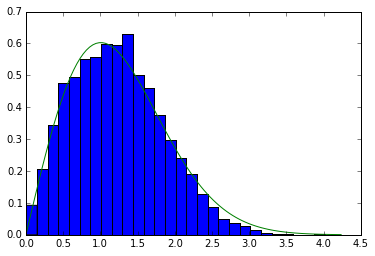

In [79]:
figure(1)

probs = hist(ultimas, normed = True, bins = 30)

probabilidades = probs[0]
rapideces = probs[1]
rapideces = array([(rapideces[i-1] + rapideces[i])/ 2 for i in range(1, len(rapideces))]) 

par, err = curve_fit(prob, rapideces, probabilidades)

print par[0]
print err

x = linspace(0, max(rapideces), 100)
y = prob(x, par[0])

plot(x, y)

In [93]:
%pylab
from matplotlib import animation

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [98]:
xs = data[:, 0]
ys = data[:, 1]
t = linspace(0, 0.005 * 1000, len(xs) / 1600)
print len(xs) / 1600
print min(x), max(x)
print min(y), max(y)
print len(t)
print len(t) * 1600

501
0.0 4.23591427435
0.0 0.602533076577
501
801600


In [110]:
fig = figure(2)

ax = fig.add_subplot(111, autoscale_on=False, xlim=(min(xs) - 0.1, max(xs) + 0.1), ylim=(min(ys) - 0.1, max(ys) + 0.1))
ax.grid()

line, = ax.plot([], [], 'go', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

dt = 0.01
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = xs[1600 * i : 1600 * (i + 1)]
    thisy = ys[1600 * i : 1600 * (i + 1)]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template%(i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
    interval=1, blit=False, init_func=init)

show()